




<h2 id='part1'>Analyzing Stack Overflow Usage Patterns Among Developers</h2>
The data set is stack-overflow-developer-survey 2024.
Three questions are:
+ What is the main user groups utilizing Stack Overflow (developer, hobby, learner, former developer, not a developer)
+ What are their primary motivations for using Stack Overflow 
+ Most technology they used in 2024

<h3 id='q1'>1. Business Understanding</h3>
Objective:

This analysis aims to gain insights into the usage patterns of Stack Overflow among developers and related individuals. Specifically, we will investigate:
+ Identify the different user groups utilizing Stack Overflow (professional developers, hobbyists, learners, former developers, non-developers).
+ Determine the primary motivations for using Stack Overflow (e.g., learning, troubleshooting, finding solutions, seeking career advice).
+ Identify the most commonly used technologies among Stack Overflow users in 2024.

Business Value:
+ Gain a better understanding of how developers utilize Stack Overflow and the technologies they are working with.
+ Identify emerging trends and technologies in the developer ecosystem.
+ Provide valuable insights for career development and skill enhancement.

<h3 id='q1'>2. Data Understanding</h3>

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('../data/survey_results_public.csv')
schema = pd.read_csv('../data/survey_results_schema.csv')

df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


Following is schema information

In [32]:
schema.head()

,qid,qname,question,force_resp,type,selector
0,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
1,QID127,Age,What is your age?*,True,MC,SAVR
2,QID296,Employment,Which of the following best describes your cur...,True,MC,MAVR
3,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
4,QID341,Check,Just checking to make sure you are paying atte...,True,MC,SAVR


**1.** Provide the number of rows and columns in this dataset.

In [33]:
# We solved this one for you by providing the number of rows and columns:
# You can see how we are prompted that we solved for the number of rows and cols correctly!

num_rows = df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1] #Provide the number of columns in the dataset

print("number of rows: ", num_rows)
print("number of columns: ", num_cols)

number of rows:  65437
number of columns:  114


**2.** Which columns had no missing values? Provide a set of column names that have no missing values.

In [34]:
no_nulls = set(df.columns[df.isnull().mean()==0])#Provide a set of columns with 0 missing values.

print(no_nulls)

{'MainBranch', 'Employment', 'ResponseId', 'Check', 'Age'}


**3.** Which columns have the most missing values?  Provide a set of column name that have more than 75% if their values missing.

In [35]:
most_missing_cols = set(df.columns[df.isnull().mean() > 0.75])#Provide a set of columns with more than 75% of the values missing

print(most_missing_cols)

{'AINextLess integrated', 'AINextMuch less integrated', 'AINextNo change', 'AINextMuch more integrated'}


<h3 id='q1'>3. Answering Research Questions </h3>

**1.** Common function that can be reuse in analysis: 

In [36]:
def draw_chart(dataframe, chart_kind, chart_title):
    dataframe.plot(kind=chart_kind);
    plt.title(chart_title);

def get_categories_from_dataframe(dataframe, check_column):
    dftmp = pd.DataFrame([])
    pd.options.mode.copy_on_write = True
    dftmp['lst'] = dataframe[check_column].str.split(';')
    dftmp_exp = dftmp.explode('lst')
    return dftmp_exp['lst'].dropna().unique()

def draw_chart_by_categories(dataframe, check_column, categories, chart_kind, chart_title, top_n=0):
    mask = dataframe[check_column].isin(categories)
    df_pro_mask = dataframe[mask]
    if top_n <= 0:
        mask_vals  = df_pro_mask[check_column].value_counts()
    else:
        mask_vals  = df_pro_mask[check_column].value_counts().nlargest(top_n)
    draw_chart(mask_vals/df_pro_mask.shape[0], chart_kind, chart_title)


**1.** Answer question: what is the main user groups utilizing Stack Overflow (developer, hobby, learner, former developer, not a developer): 

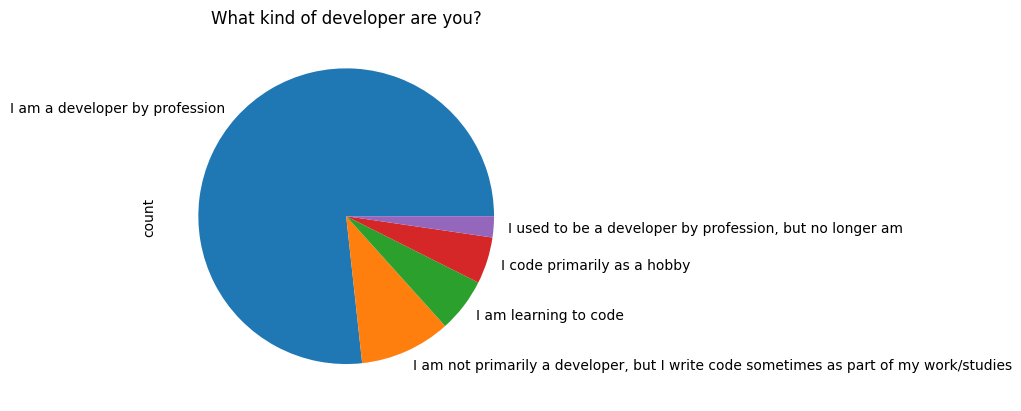

In [37]:
status_vals = df.MainBranch.value_counts()
draw_chart(status_vals/df.shape[0], "pie", "What kind of developer are you?")

Look at the chart we can conclusion that **most people use StackOverFlow are Profession Developer.**
Now try to answer the question

**2.** What purpose when they use stackoverflow


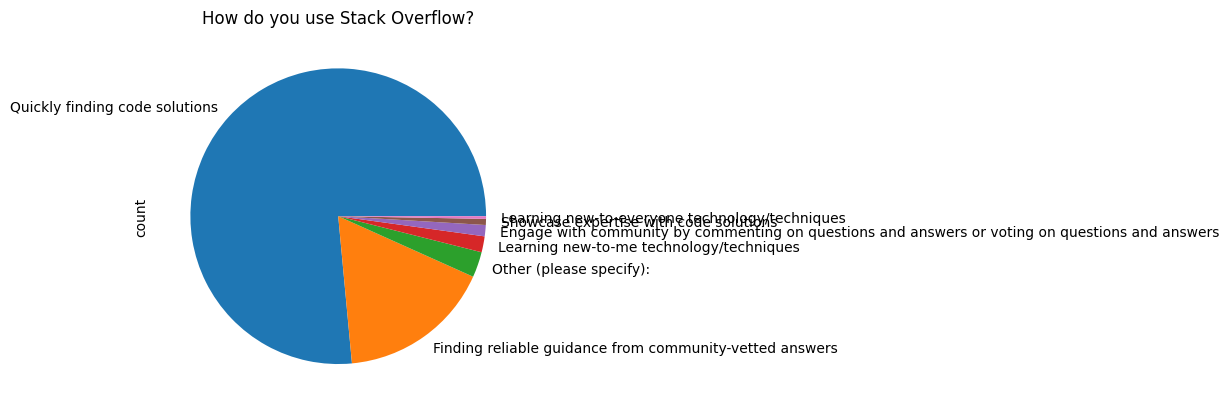

In [38]:
# get all the record of profession
df_pro = df[df['MainBranch']=='I am a developer by profession']
job_to_check = get_categories_from_dataframe(df_pro, 'SOHow')
draw_chart_by_categories(df_pro, 'SOHow', job_to_check, "pie", "How do you use Stack Overflow?")

Look at the chart we can conclusion that **most Profession Developer use Stack Overflow to quickly finding code solutions.**
Now try to answer the question

**3.** Most technology they used in 2024

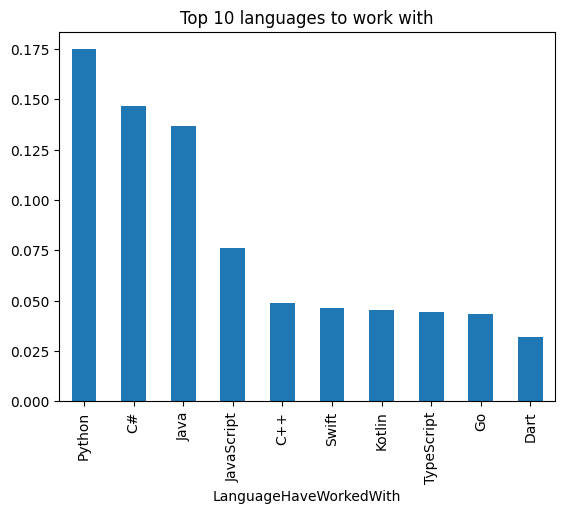

In [39]:
languages_to_check = get_categories_from_dataframe(df_pro, 'LanguageHaveWorkedWith')
draw_chart_by_categories(df_pro, 'LanguageHaveWorkedWith', languages_to_check, "bar", "Top 10 languages to work with", 10)

#	LanguageWantToWorkWith	LanguageAdmired	DatabaseHaveWorkedWith	DatabaseWantToWorkWith	DatabaseAdmired	PlatformHaveWorkedWith	PlatformWantToWorkWith	PlatformAdmired	WebframeHaveWorkedWith	WebframeWantToWorkWith	WebframeAdmired	EmbeddedHaveWorkedWith	EmbeddedWantToWorkWith	EmbeddedAdmired	MiscTechHaveWorkedWith	MiscTechWantToWorkWith	MiscTechAdmired	ToolsTechHaveWorkedWith	ToolsTechWantToWorkWith	ToolsTechAdmired

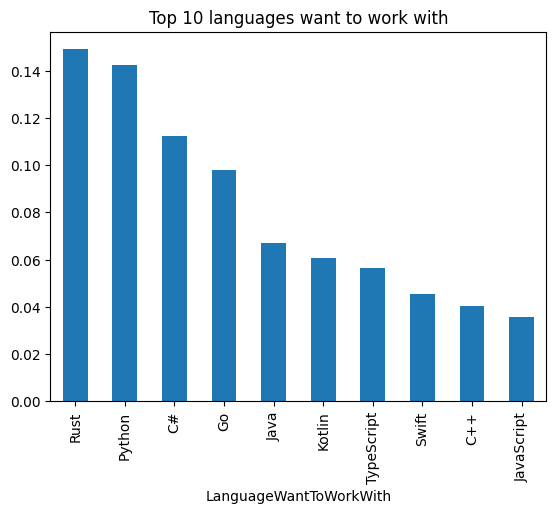

In [40]:
languages_to_check = get_categories_from_dataframe(df_pro, 'LanguageWantToWorkWith')
draw_chart_by_categories(df_pro, 'LanguageWantToWorkWith', languages_to_check, "bar", "Top 10 languages want to work with", 10)
#		LanguageAdmired	DatabaseHaveWorkedWith	DatabaseWantToWorkWith	DatabaseAdmired	PlatformHaveWorkedWith	PlatformWantToWorkWith	PlatformAdmired	WebframeHaveWorkedWith	WebframeWantToWorkWith	WebframeAdmired	EmbeddedHaveWorkedWith	EmbeddedWantToWorkWith	EmbeddedAdmired	MiscTechHaveWorkedWith	MiscTechWantToWorkWith	MiscTechAdmired	ToolsTechHaveWorkedWith	ToolsTechWantToWorkWith	ToolsTechAdmired


Currently, the most commonly used programming languages in the professional world include Python, C#, Java, JavaScript, and C++.

By comparing the languages developers have worked with (LanguageHaveWorkedWith) and the languages they desire to work with (LanguageWantToWorkWith), we can observe a significant interest in the Rust programming language. This suggests that Rust may become a prominent and influential language in the future.